### Scientific Notebook of Aye Aye Project Update 18.09.2024


## DATA: Benefit Knowledge

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from scipy.stats import spearmanr
import shap
import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import jaccard_score, accuracy_score, classification_report, mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.inspection import permutation_importance
from sklearn.feature_selection import chi2
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest




In [2]:
### 0. Importing data ###
dataBK = pd.read_csv(r'C:\Users\yazda\Desktop\AyeAye2024\Aye-Aye-Project\data\Benefit_Knowledge_data.csv', delimiter=';')
target = dataBK['Clove.benefit.score']
dataBK.head(10)

,Clove.benefit.score,ID.nom,ID.vis.Aye,Other.lemurs,Diet.Insects,Knowledge.signs,Knowledge.Abundance,Activity.knowledge,Weight.knowledge,Lifestyle.knowledge,Lemur.knowledge,Aye.aye.protected,encountered.binary
0,1,0,0,1,1,0,1,1,0,0,1,1,0
1,1,1,1,1,1,1,1,1,0,1,1,1,0
2,1,0,0,1,0,0,1,1,0,0,1,1,0
3,1,1,1,1,1,0,1,1,1,1,1,1,1
4,0,1,1,1,0,0,1,1,0,1,0,1,0
5,0,0,0,1,1,0,0,1,0,0,1,1,0
6,1,1,0,1,1,0,1,1,0,1,0,1,0
7,1,0,0,1,0,0,1,1,0,1,0,1,0
8,0,0,0,0,1,0,1,1,0,0,1,1,0
9,0,0,0,0,0,0,1,1,0,1,1,0,0


### Jaccard Correlation Score on all features using weighted average

                 Column  Jaccard_Score
0                ID.nom       0.350691
1            ID.vis.Aye       0.452403
2          Other.lemurs       0.414112
3          Diet.Insects       0.538827
4       Knowledge.signs       0.398559
5   Knowledge.Abundance       0.417170
6    Activity.knowledge       0.463580
7      Weight.knowledge       0.424636
8   Lifestyle.knowledge       0.409083
9       Lemur.knowledge       0.423635
10    Aye.aye.protected       0.396862
11   encountered.binary       0.417736


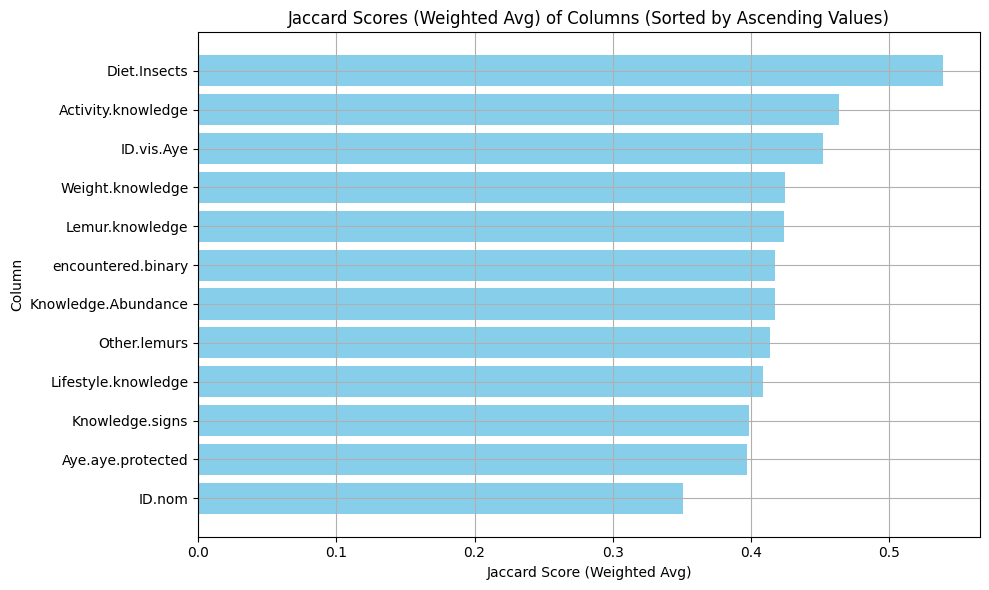

In [3]:
jaccard_scores = {}
for col in dataBK.columns:
    if col != 'Clove.benefit.score':  # Skip the target column
        try:
            unique_values = dataBK[col].nunique()
            score = jaccard_score(target, dataBK[col], average='weighted')
            jaccard_scores[col] = score
            
        except ValueError as e:
            print(f"Could not calculate Jaccard score for column {col}: {e}")
            jaccard_scores[col] = None
jaccard_df = pd.DataFrame(list(jaccard_scores.items()), columns=['Column', 'Jaccard_Score'])
print(jaccard_df)
jaccard_df = jaccard_df.sort_values(by='Jaccard_Score', ascending=True)
plt.figure(figsize=(10, 6))
plt.barh(jaccard_df['Column'], jaccard_df['Jaccard_Score'], color='skyblue')
plt.xlabel('Jaccard Score (Weighted Avg)')
plt.ylabel('Column')
plt.title('Jaccard Scores (Weighted Avg) of Columns (Sorted by Ascending Values)')
plt.grid(True)
plt.tight_layout()
plt.show()


### Jaccard Correlation Score on all features using micro average

                 Column  Jaccard_Score
0                ID.nom       0.368237
1            ID.vis.Aye       0.476460
2          Other.lemurs       0.430657
3          Diet.Insects       0.540275
4       Knowledge.signs       0.417722
5   Knowledge.Abundance       0.415162
6    Activity.knowledge       0.465421
7      Weight.knowledge       0.435897
8   Lifestyle.knowledge       0.407540
9       Lemur.knowledge       0.422868
10    Aye.aye.protected       0.415162
11   encountered.binary       0.441176


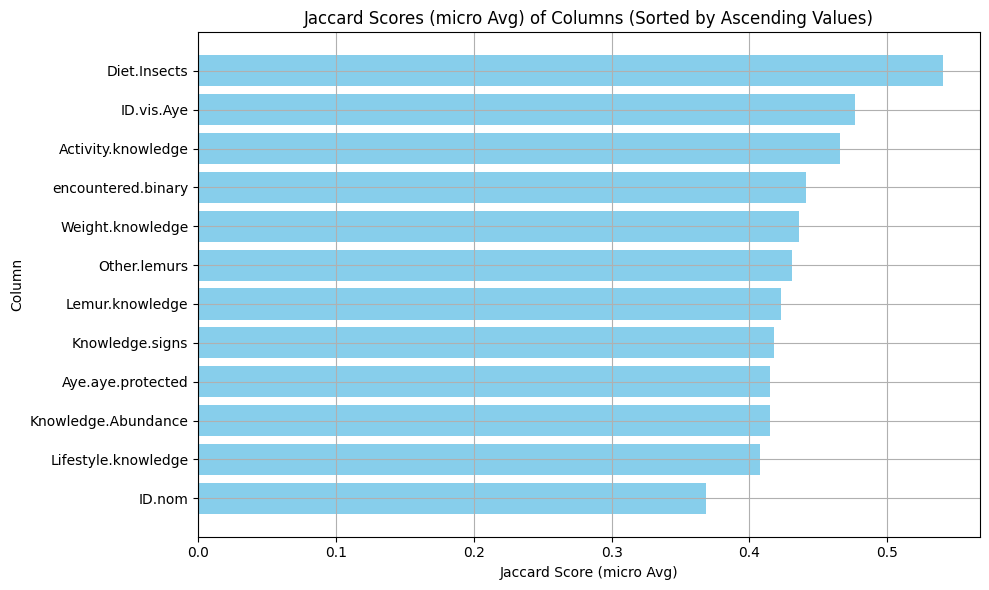

In [4]:
for col in dataBK.columns:
    if col != 'Clove.benefit.score':  # Skip the target column
        try:
            unique_values = dataBK[col].nunique()
            score = jaccard_score(target, dataBK[col], average='micro')
            jaccard_scores[col] = score
            
        except ValueError as e:
            print(f"Could not calculate Jaccard score for column {col}: {e}")
            jaccard_scores[col] = None
jaccard_df = pd.DataFrame(list(jaccard_scores.items()), columns=['Column', 'Jaccard_Score'])
print(jaccard_df)
jaccard_df = jaccard_df.sort_values(by='Jaccard_Score', ascending=True)
plt.figure(figsize=(10, 6))
plt.barh(jaccard_df['Column'], jaccard_df['Jaccard_Score'], color='skyblue')
plt.xlabel('Jaccard Score (micro Avg)')
plt.ylabel('Column')
plt.title('Jaccard Scores (micro Avg) of Columns (Sorted by Ascending Values)')
plt.grid(True)
plt.tight_layout()
plt.show()

### Spearman Correlation with Target Column:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



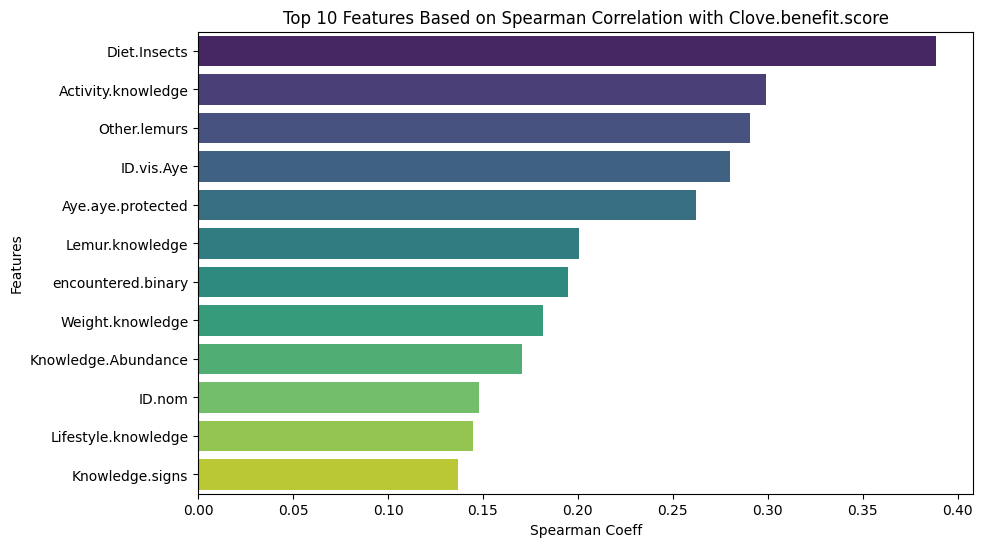

In [5]:
# Step 1: Calculate Spearman correlation with the target
dataBK1 = dataBK.drop(columns=['Clove.benefit.score'])
spearman_corr = dataBK1.apply(lambda x: spearmanr(x, target)[0])

# Step 2: Select top features based on Spearman correlation
top_features = spearman_corr.abs().sort_values(ascending=False).index[:30]  # Top 30 features
top_spearman_corr = spearman_corr[top_features]

# Step 3: Plot the Spearman correlation values for the top features
plt.figure(figsize=(10, 6))
sns.barplot(x=top_spearman_corr.values, y=top_spearman_corr.index, palette="viridis")
plt.title('Top 10 Features Based on Spearman Correlation with Clove.benefit.score')
plt.xlabel('Spearman Coeff')
plt.ylabel('Features')
plt.show()

In [6]:
top_spearman_corr

Diet.Insects           0.388766
Activity.knowledge     0.299081
Other.lemurs           0.290874
ID.vis.Aye             0.280184
Aye.aye.protected      0.262131
Lemur.knowledge        0.200404
encountered.binary     0.194617
Weight.knowledge       0.181684
Knowledge.Abundance    0.170565
ID.nom                 0.147828
Lifestyle.knowledge    0.144869
Knowledge.signs        0.136833
dtype: float64

### Training Logistic Regression and Feature Importance based on LR 

Logistic Regression Feature Importance:
Other.lemurs           0.525319
Diet.Insects           0.455804
Aye.aye.protected      0.336026
Activity.knowledge     0.331145
Weight.knowledge       0.186079
ID.vis.Aye             0.150181
Knowledge.signs        0.121222
Lifestyle.knowledge    0.072264
ID.nom                 0.004610
Lemur.knowledge       -0.040376
Knowledge.Abundance   -0.041938
encountered.binary    -0.071931
dtype: float64




Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



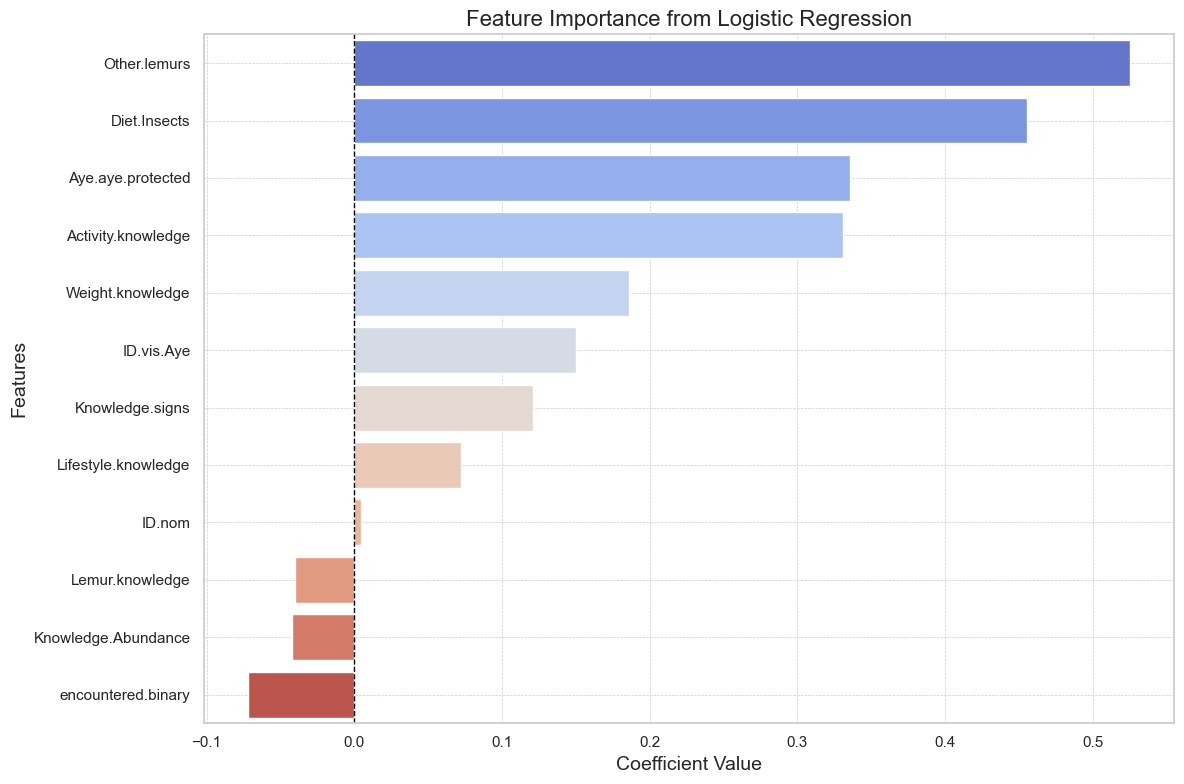

In [7]:
# sf = [
#     'Knowledge.non.benefit.score.max.6', 'Diet.Insects', 'Gender_Male', 'Gender_Female',
#     'ID.vis.Aye', 'ID.vis.Microcebus', 'Aye.aye.protected', 'ID.vis.Indri',
#     'encountered.binary', 'Extracts.Medical.plants', 'ID.nom', 'Farms.Cloves',
#     'Region_A', 'Region_B', 'Region_C', 'Region_X',
#     'Age_31-40', 'Age_41-50', 'Age_51-60',
#     'edu.level_1', 'edu.level_2', 'edu.level_3',
#     'edu.level_4'
# ]

# Separate the selected features and target variable
X = dataBK1
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.3, random_state=123)
# Standardize the features (important for logistic regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the logistic regression model
modelLr = LogisticRegression()
modelLr.fit(X_train_scaled, y_train)

# Get feature importance from Logistic Regression (coefficients)
feature_importance_logreg = pd.Series(modelLr.coef_[0], index=dataBK1.columns)

# Display feature importance
print("Logistic Regression Feature Importance:")
print(feature_importance_logreg.sort_values(ascending=False))
feature_importance_logreg_sorted = feature_importance_logreg.sort_values(ascending=False)
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))
sns.barplot(x=feature_importance_logreg_sorted.values, y=feature_importance_logreg_sorted.index, palette="coolwarm")
plt.title('Feature Importance from Logistic Regression', fontsize=16)
plt.xlabel('Coefficient Value', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.grid(True, linestyle='--', linewidth=0.5)
# Add a vertical line at x=0 to separate positive and negative contributions
plt.axvline(x=0, color='black', linestyle='--', linewidth=1)
plt.tight_layout()
plt.show()

### Training XGBoost like the other pipeline for LR 

Diet.Insects           0.210337
Other.lemurs           0.175806
Knowledge.signs        0.079568
Activity.knowledge     0.075938
Lemur.knowledge        0.069327
Aye.aye.protected      0.065174
Weight.knowledge       0.060701
Knowledge.Abundance    0.060270
encountered.binary     0.057603
ID.nom                 0.049152
ID.vis.Aye             0.049038
Lifestyle.knowledge    0.047086
dtype: float32




Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



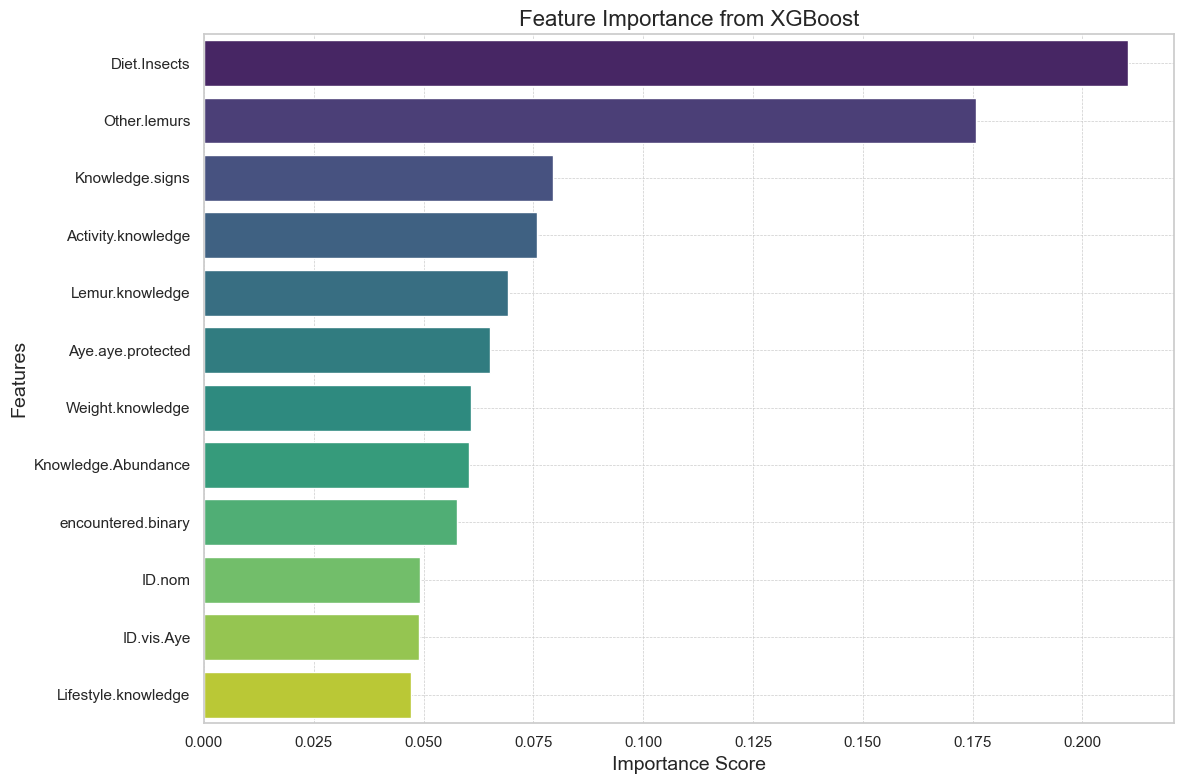

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.2, random_state=123)

# Training and Getting Feature Importance from XGBoost
xgb_model = xgb.XGBClassifier(use_label_encoder=False)
xgb_model.fit(X_train, y_train)
xgb_importance = pd.Series(xgb_model.feature_importances_, index=dataBK1.columns)
xgb_importance_sorted = xgb_importance.sort_values(ascending=False)
print(xgb_importance_sorted)


# PLOTTING
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))
sns.barplot(x=xgb_importance_sorted.values, y=xgb_importance_sorted.index, palette="viridis")
plt.title('Feature Importance from XGBoost', fontsize=16)
plt.xlabel('Importance Score', fontsize=14)
plt.ylabel('Features', fontsize=14)

# Add a grid for better readability
plt.grid(True, linestyle='--', linewidth=0.5)

# Show the plot
plt.tight_layout()
plt.show()

### Random Forest Feature Importance (Pipeline the Same as LR and XGBoost)

Diet.Insects           0.134581
Other.lemurs           0.099524
Activity.knowledge     0.091043
Lemur.knowledge        0.088551
Lifestyle.knowledge    0.087891
Knowledge.Abundance    0.085842
Aye.aye.protected      0.074955
Weight.knowledge       0.074030
ID.nom                 0.069995
Knowledge.signs        0.066882
ID.vis.Aye             0.065566
encountered.binary     0.061141
dtype: float64




Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



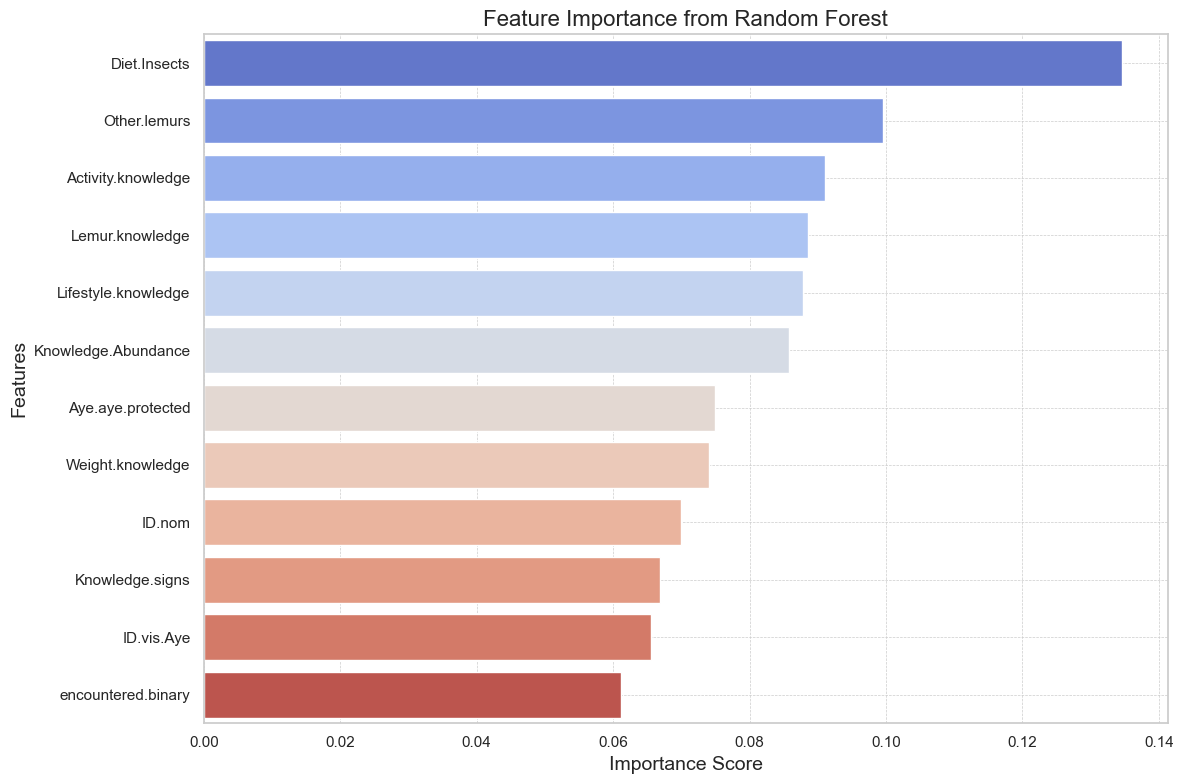

In [9]:
# Train & Get feature importance the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=123)
rf_model.fit(X_train, y_train)
rf_importance = pd.Series(rf_model.feature_importances_, index=dataBK1.columns)
rf_importance_sorted = rf_importance.sort_values(ascending=False)
print(rf_importance_sorted)
plt.figure(figsize=(12, 8))
sns.barplot(x=rf_importance_sorted.values, y=rf_importance_sorted.index, palette="coolwarm")
plt.title('Feature Importance from Random Forest', fontsize=16)
plt.xlabel('Importance Score', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.grid(True, linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

### Checking Permutation Importance
<br>
Explanation: Permutation Importance assesses the importance of features by measuring the decrease in model performance when the values of a feature are randomly shuffled. This method is model-agnostic and can be used with any model.
<br>
ref: https://scikit-learn.org/stable/modules/permutation_importance.html>

Diet.Insects           0.113924
Aye.aye.protected      0.045570
ID.vis.Aye             0.043038
Knowledge.Abundance    0.040506
Lemur.knowledge        0.035443
Lifestyle.knowledge    0.032911
Activity.knowledge     0.022785
Other.lemurs           0.020253
encountered.binary     0.012658
Weight.knowledge       0.005063
Knowledge.signs        0.005063
ID.nom                 0.002532
dtype: float64




Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



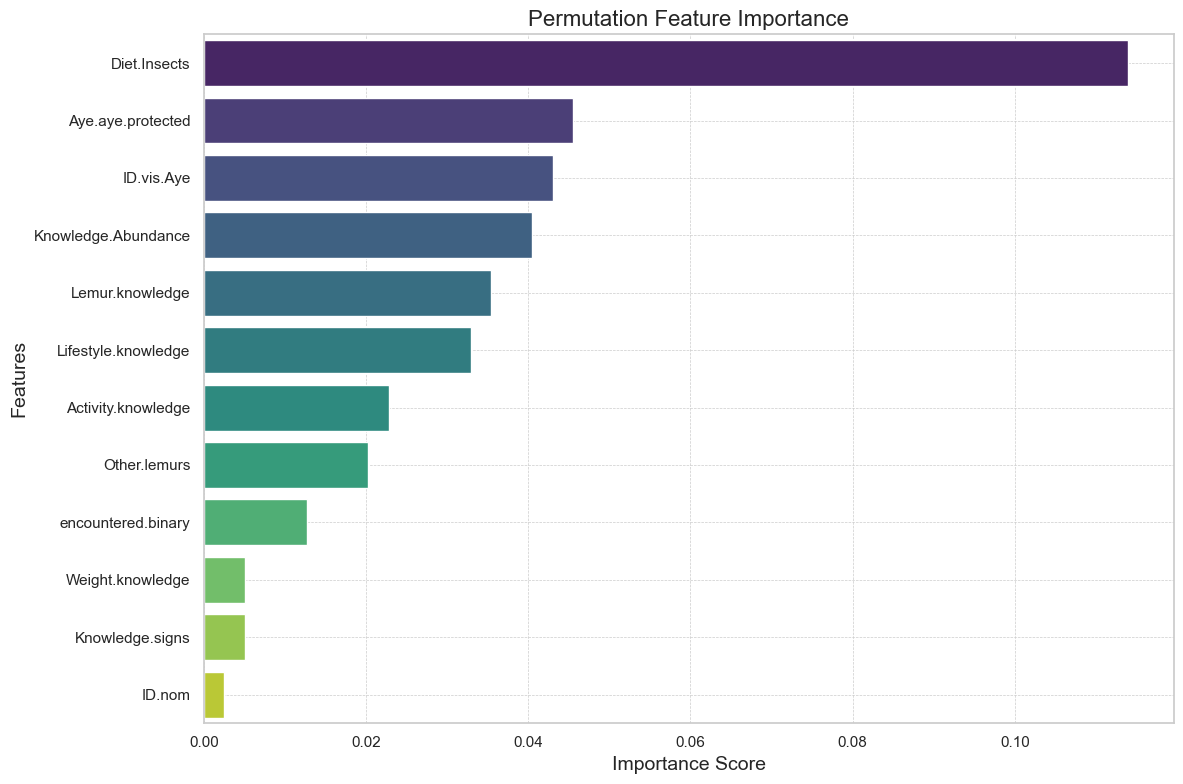

In [10]:
# Calculate permutation importance with RF model
results = permutation_importance(rf_model, X_test, y_test, scoring='accuracy')
perm_importance = pd.Series(results.importances_mean, index=dataBK1.columns)
perm_importance_sorted = perm_importance.sort_values(ascending=False)
print(perm_importance_sorted)
# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(x=perm_importance_sorted.values, y=perm_importance_sorted.index, palette="viridis")
plt.title('Permutation Feature Importance', fontsize=16)
plt.xlabel('Importance Score', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.grid(True, linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

Diet.Insects           9.367089e-02
Activity.knowledge     3.037975e-02
Aye.aye.protected      3.037975e-02
Lemur.knowledge        2.278481e-02
Other.lemurs           2.025316e-02
Lifestyle.knowledge    1.772152e-02
Knowledge.signs       -2.220446e-17
ID.nom                -5.063291e-03
ID.vis.Aye            -7.594937e-03
Weight.knowledge      -1.012658e-02
Knowledge.Abundance   -1.772152e-02
encountered.binary    -2.784810e-02
dtype: float64




Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



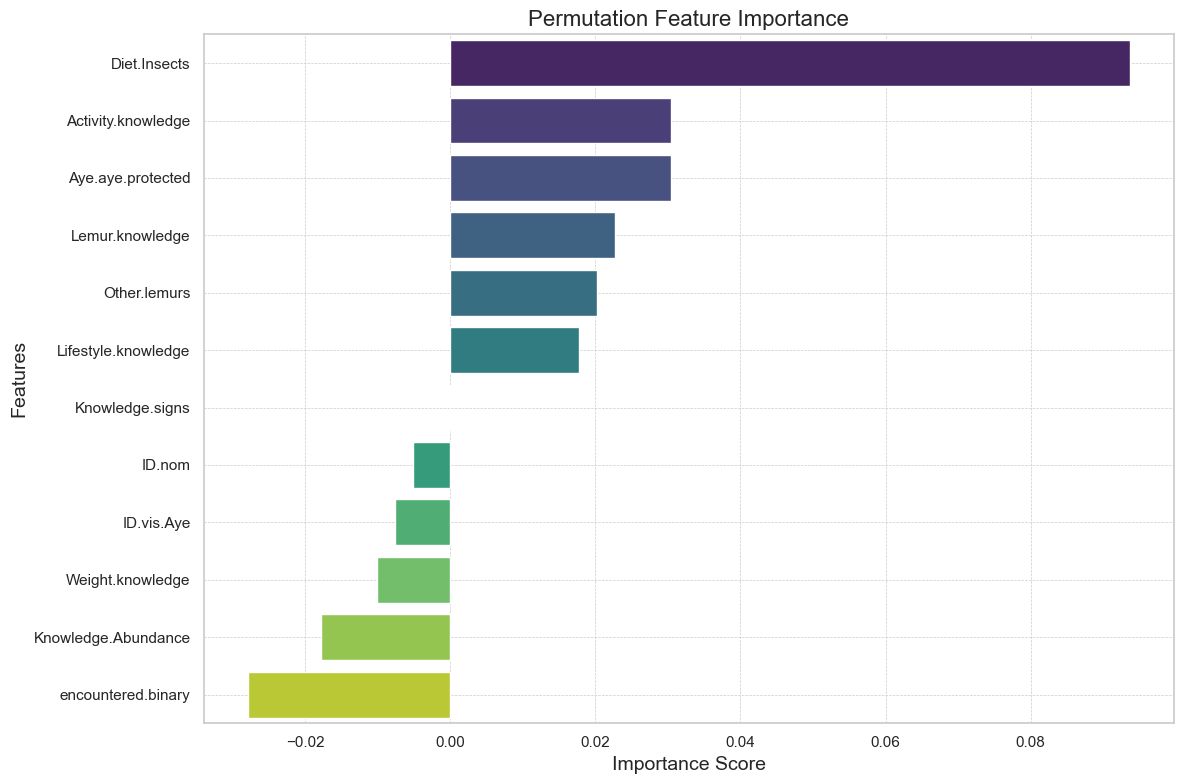

In [11]:
# Calculate permutation importance with XGboost Model
results = permutation_importance(xgb_model, X_test, y_test, scoring='accuracy')
perm_importance = pd.Series(results.importances_mean, index=dataBK1.columns)
perm_importance_sorted = perm_importance.sort_values(ascending=False)
print(perm_importance_sorted)
# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(x=perm_importance_sorted.values, y=perm_importance_sorted.index, palette="viridis")
plt.title('Permutation Feature Importance', fontsize=16)
plt.xlabel('Importance Score', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.grid(True, linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

#### LR & XGBOOST & RF accuracy


In [12]:

X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.2, random_state=123)
modelLr = LogisticRegression(max_iter=1000)
modelLr.fit(X_train, y_train)

# Evaluate the model
y_pred = modelLr.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")

Accuracy: 0.7088607594936709
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.79      0.76        47
           1       0.66      0.59      0.62        32

    accuracy                           0.71        79
   macro avg       0.70      0.69      0.69        79
weighted avg       0.71      0.71      0.71        79



In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.3, random_state=123)

# Evaluate the model
y_pred = xgb_model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")

Accuracy: 0.7372881355932204
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.74      0.77        70
           1       0.66      0.73      0.69        48

    accuracy                           0.74       118
   macro avg       0.73      0.74      0.73       118
weighted avg       0.74      0.74      0.74       118



In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.3, random_state=123)

# Evaluate the model
y_pred = rf_model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")

Accuracy: 0.7711864406779662
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.80      0.81        70
           1       0.71      0.73      0.72        48

    accuracy                           0.77       118
   macro avg       0.76      0.76      0.76       118
weighted avg       0.77      0.77      0.77       118



In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.3, random_state=42, stratify=target)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model: XGBoost with Grid Search for hyperparameter tuning
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Parameters for tuning
param_grid = {
    'learning_rate': [0.001, 0.01, 0.1],
    'max_depth': [5, 7, 10],
    'n_estimators': [100, 300, 500],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# Grid search to find the best parameters
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, scoring='accuracy', cv=5, verbose=1, n_jobs=-1)

# Fit the model
grid_search.fit(X_train_scaled, y_train)

# Best parameters from grid search
best_params = grid_search.best_params_

# Final model with best parameters
final_model = XGBClassifier(**best_params, use_label_encoder=False, eval_metric='logloss')
final_model.fit(X_train_scaled, y_train)

# Predictions and accuracy
y_pred = final_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)

print(f"Best Hyperparameters: {best_params}")
print(f"Accuracy: {accuracy * 100:.2f}%")
print(classification_report(y_test, y_pred))

# SHAP for feature importance
explainer = shap.TreeExplainer(final_model)
shap_values = explainer.shap_values(X_test_scaled)

shap.summary_plot(shap_values, X_test, plot_type="bar")

NameError: name 'XGBClassifier' is not defined

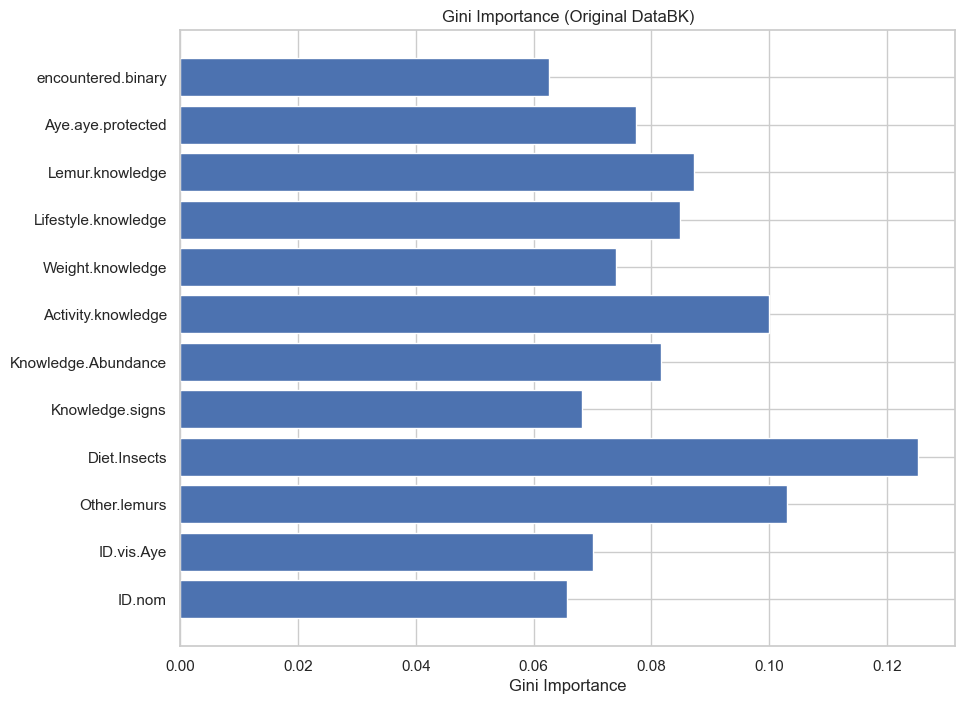

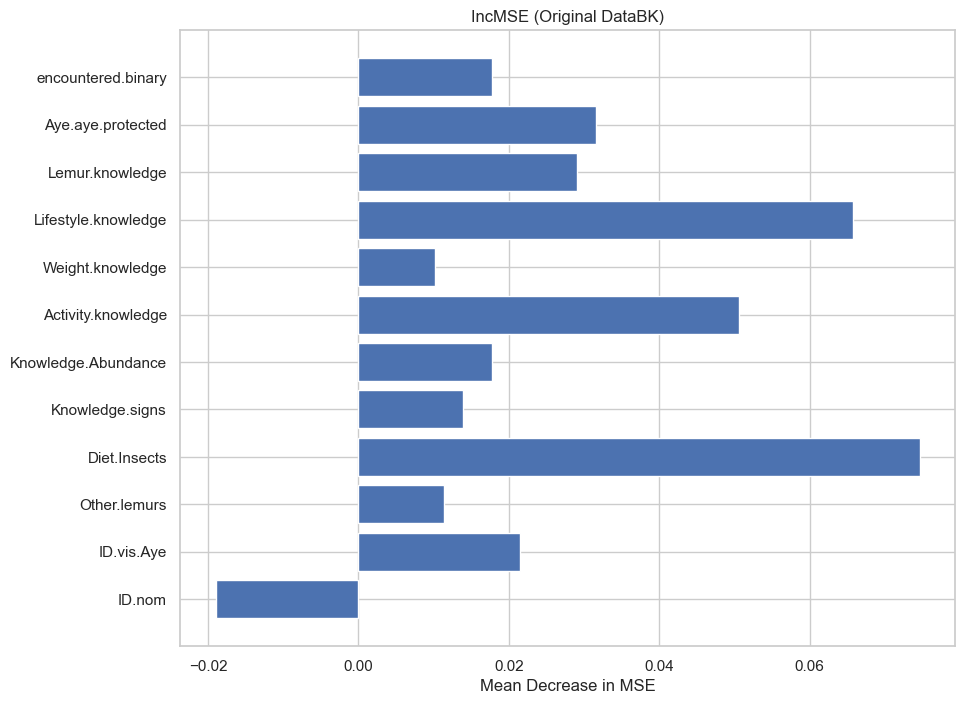

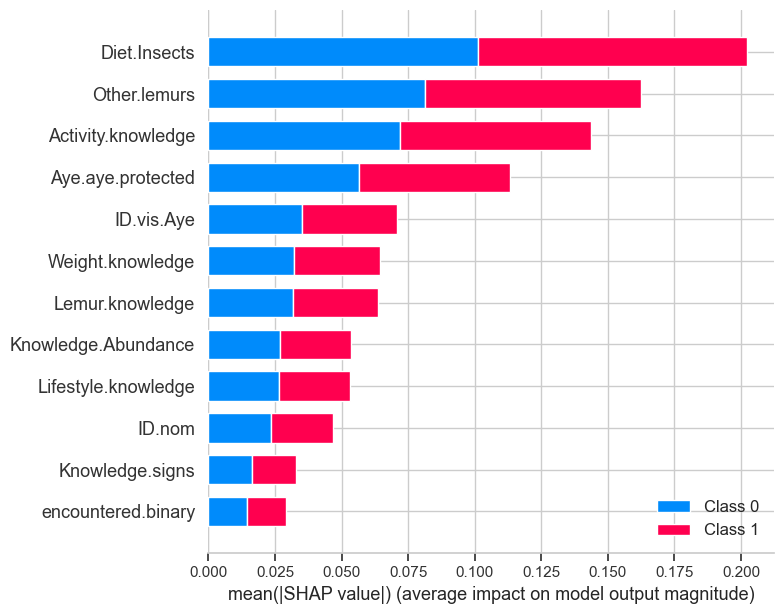

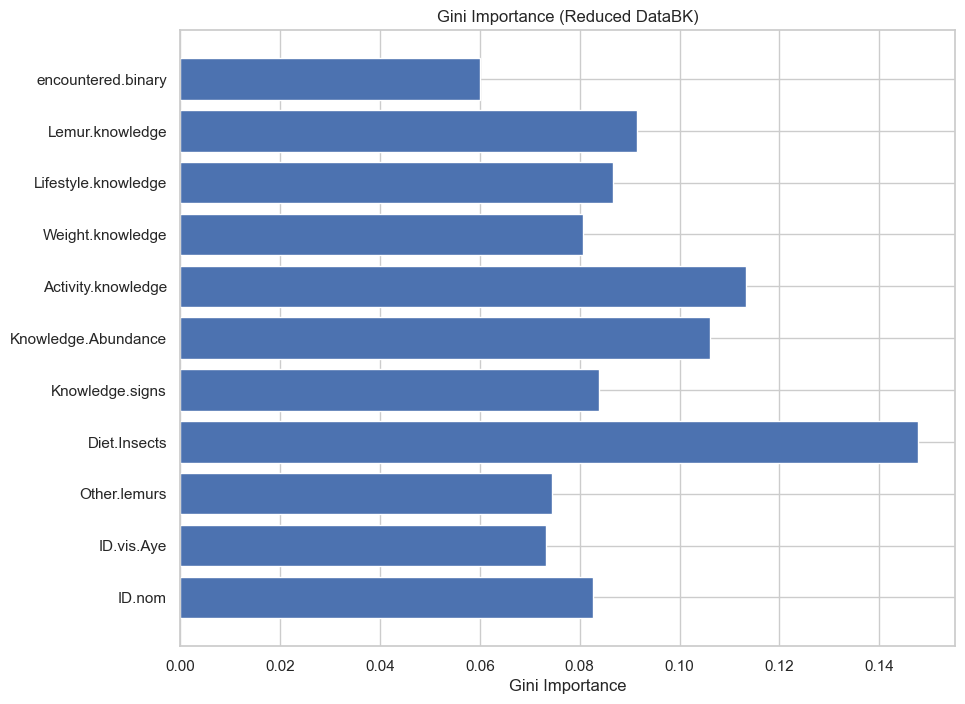

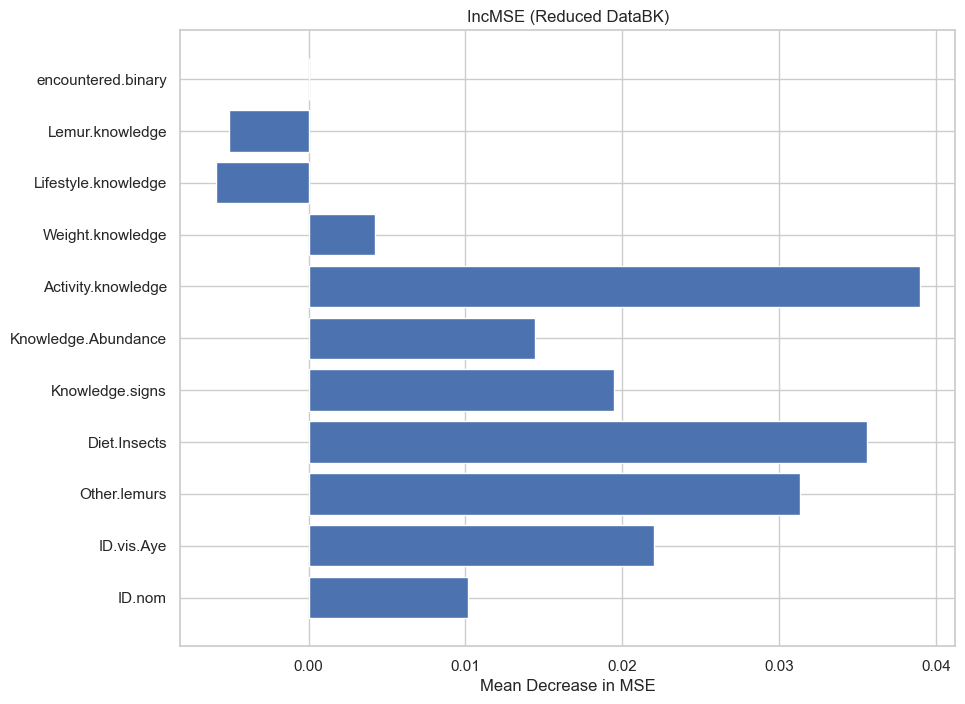

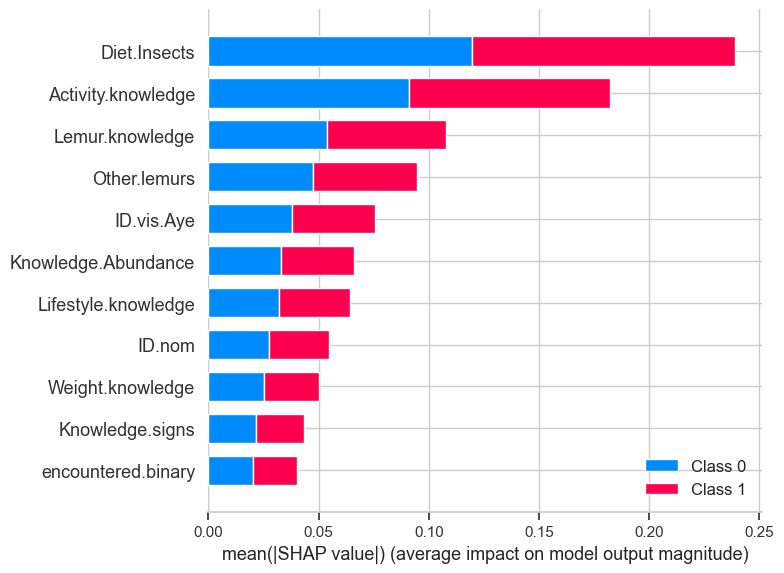

Original R-squared: -0.20811170212765928, Reduced R-squared: -0.25459770114942537
Original MSE: 0.2911392405063291, Reduced MSE: 0.3135593220338983


In [16]:
X_bk = dataBK.drop(columns=['Clove.benefit.score'])  
y_bk = dataBK['Clove.benefit.score'] 
X_train_bk, X_test_bk, y_train_bk, y_test_bk = train_test_split(X_bk, y_bk, test_size=0.2, random_state=123)
rf_bk = RandomForestClassifier(random_state=42)
rf_bk.fit(X_train_bk, y_train_bk)
y_pred_bk = rf_bk.predict(X_test_bk)

# feature importance (Gini Importance)
gini_importance_bk = rf_bk.feature_importances_
features = X_bk.columns
plt.figure(figsize=(10, 8))
plt.barh(features, gini_importance_bk)
plt.title("Gini Importance (Original DataBK)")
plt.xlabel("Gini Importance")
plt.show()

# incMSE (using permutation importance)
result = permutation_importance(rf_bk, X_test_bk, y_test_bk, n_repeats=10, random_state=42)
perm_importance_bk = result.importances_mean
plt.figure(figsize=(10, 8))
plt.barh(features, perm_importance_bk)
plt.title("IncMSE (Original DataBK)")
plt.xlabel("Mean Decrease in MSE")
plt.show()

# SHAP values
explainer = shap.TreeExplainer(rf_bk)
shap_values = explainer.shap_values(X_test_bk)
shap.summary_plot(shap_values, X_test_bk)

# ------------------------
#  VIF-reduced dataset (removing 'Aye.aye.protected')
# ------------------------
X_bk_reduced = X_bk.drop(columns=['Aye.aye.protected'])
X_train_bk_reduced, X_test_bk_reduced, y_train_bk_reduced, y_test_bk_reduced = train_test_split(X_bk_reduced, y_bk, test_size=0.3, random_state=42)
rf_bk_reduced = RandomForestClassifier(random_state=42)
rf_bk_reduced.fit(X_train_bk_reduced, y_train_bk_reduced)
y_pred_bk_reduced = rf_bk_reduced.predict(X_test_bk_reduced)
gini_importance_bk_reduced = rf_bk_reduced.feature_importances_
features_reduced = X_bk_reduced.columns
plt.figure(figsize=(10, 8))
plt.barh(features_reduced, gini_importance_bk_reduced)
plt.title("Gini Importance (Reduced DataBK)")
plt.xlabel("Gini Importance")
plt.show()
result_reduced = permutation_importance(rf_bk_reduced, X_test_bk_reduced, y_test_bk_reduced, n_repeats=10, random_state=42)
perm_importance_bk_reduced = result_reduced.importances_mean
plt.figure(figsize=(10, 8))
plt.barh(features_reduced, perm_importance_bk_reduced)
plt.title("IncMSE (Reduced DataBK)")
plt.xlabel("Mean Decrease in MSE")
plt.show()
explainer_reduced = shap.TreeExplainer(rf_bk_reduced)
shap_values_reduced = explainer_reduced.shap_values(X_test_bk_reduced)
shap.summary_plot(shap_values_reduced, X_test_bk_reduced)
r2_bk = r2_score(y_test_bk, y_pred_bk)
r2_bk_reduced = r2_score(y_test_bk_reduced, y_pred_bk_reduced)

mse_bk = mean_squared_error(y_test_bk, y_pred_bk)
mse_bk_reduced = mean_squared_error(y_test_bk_reduced, y_pred_bk_reduced)

print(f"Original R-squared: {r2_bk}, Reduced R-squared: {r2_bk_reduced}")
print(f"Original MSE: {mse_bk}, Reduced MSE: {mse_bk_reduced}")

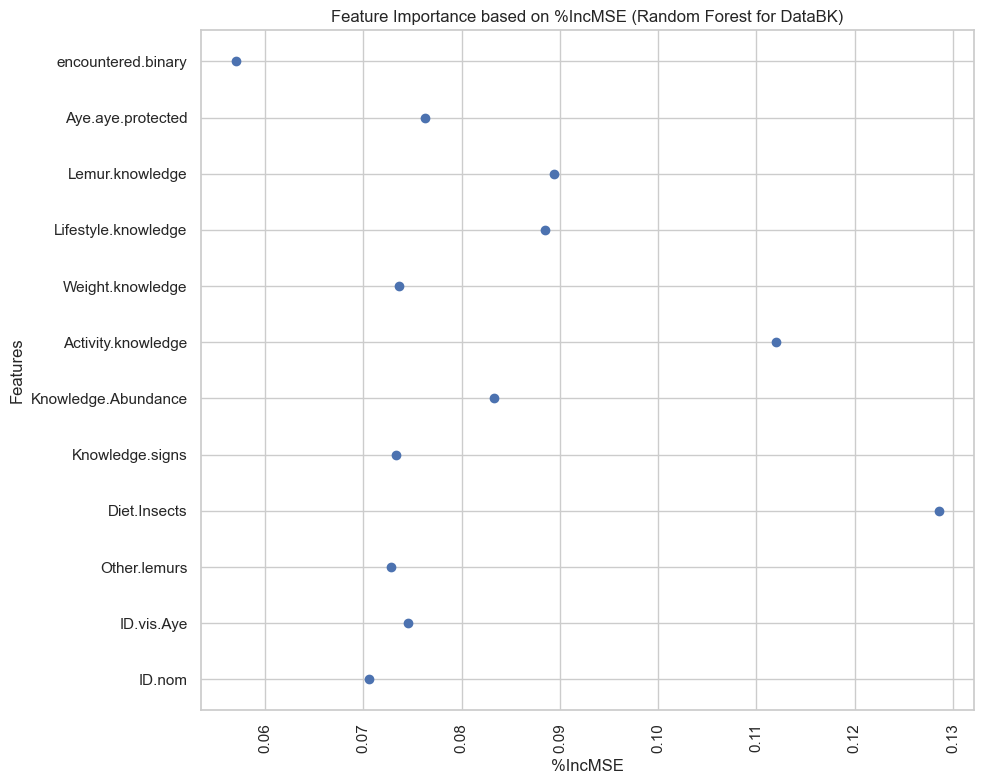

R-squared: -0.5192307692307694
Residual Std. Error: 0.6162360225133208


In [17]:
X_train_bk, X_test_bk, y_train_bk, y_test_bk = train_test_split(X_bk, y_bk, test_size=0.2, random_state=42)
rf_bk = RandomForestClassifier(random_state=42)
rf_bk.fit(X_train_bk, y_train_bk)
y_pred_bk = rf_bk.predict(X_test_bk)
# R-squared and residual standard error for the Random Forest model
r_squared_bk = r2_score(y_test_bk, y_pred_bk)
residual_std_error_bk = np.sqrt(mean_squared_error(y_test_bk, y_pred_bk))
incmse_bk = rf_bk.feature_importances_
features = X_bk.columns
plt.figure(figsize=(10, 8))
plt.scatter(incmse_bk, features)
plt.title("Feature Importance based on %IncMSE (Random Forest for DataBK)")
plt.xlabel("%IncMSE")
plt.ylabel("Features")
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()

# Display R-squared and residual standard error
print(f"R-squared: {r_squared_bk}")
print(f"Residual Std. Error: {residual_std_error_bk}")

#### Caclulate VIF

In [18]:
vif_data = pd.DataFrame()
vif_data["feature"] = X_bk.columns
vif_data["VIF"] = [variance_inflation_factor(X_bk.values, i) for i in range(X_bk.shape[1])]
print(vif_data)

                feature       VIF
0                ID.nom  3.828893
1            ID.vis.Aye  1.636362
2          Other.lemurs  3.756782
3          Diet.Insects  2.289692
4       Knowledge.signs  1.453336
5   Knowledge.Abundance  2.270492
6    Activity.knowledge  2.928078
7      Weight.knowledge  1.522554
8   Lifestyle.knowledge  2.048078
9       Lemur.knowledge  2.611394
10    Aye.aye.protected  4.139843
11   encountered.binary  1.681618


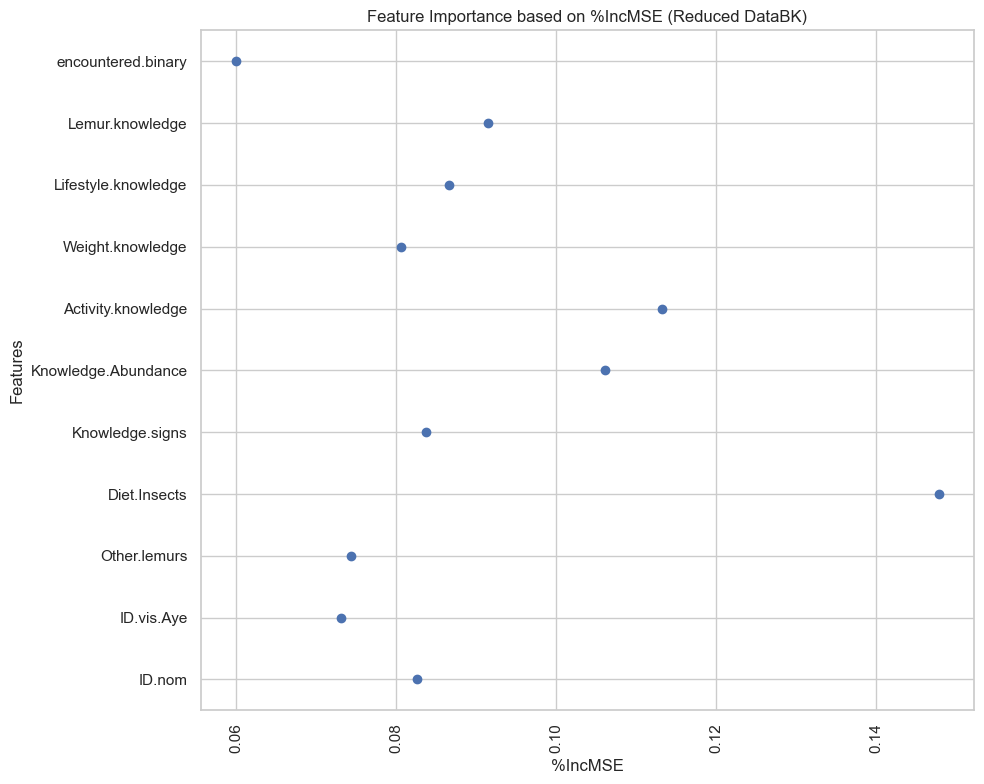

R^2: -0.25459770114942537, MSE: 0.3135593220338983, RMSE: 0.5599636792095523


In [19]:
X_bk_reduced = X_bk.drop(columns=['Aye.aye.protected'])
X_train_bk_reduced, X_test_bk_reduced, y_train_bk_reduced, y_test_bk_reduced = train_test_split(X_bk_reduced, y_bk, test_size=0.3, random_state=42)
rf_bk_reduced = RandomForestClassifier(random_state=42)
rf_bk_reduced.fit(X_train_bk_reduced, y_train_bk_reduced)
y_pred_bk_reduced = rf_bk_reduced.predict(X_test_bk_reduced)
r_squared_bk_reduced = r2_score(y_test_bk_reduced, y_pred_bk_reduced)

# Root Mean Squared Error (RMSE) Mean Squared Error (MSE)
mse_bk_reduced = mean_squared_error(y_test_bk_reduced, y_pred_bk_reduced)
rmse_bk_reduced = np.sqrt(mse_bk_reduced)
incmse_bk_reduced = rf_bk_reduced.feature_importances_

features_reduced = X_bk_reduced.columns
plt.figure(figsize=(10, 8))
plt.scatter(incmse_bk_reduced, features_reduced)
plt.title("Feature Importance based on %IncMSE (Reduced DataBK)")
plt.xlabel("%IncMSE")
plt.ylabel("Features")
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()
print(f"R^2: {r_squared_bk_reduced}, MSE: {mse_bk_reduced}, RMSE: {rmse_bk_reduced}")


## DATA SOCIOECO

In [20]:
dataSD = pd.read_csv(r'C:\Users\yazda\Desktop\AyeAye2024\Aye-Aye-Project\data\Benefit_sociodemographic_data.csv', delimiter=';')
df = pd.DataFrame(dataSD)
def preprocess_data_with_one_hot_encoding(data):
    
    # Encode columns with specific categories
    # data['Gender'] = data['Gender'].replace({1: 'Female', 2: 'Male'})
    # data['Region'] = data['Region'].replace({1: 'X', 2: 'A', 3: 'B', 4: 'C'})
    # data['Agegroup'] = data['Agegroup'].replace({
    #     1: '11-20', 
    #     2: '21-30', 
    #     3: '31-40', 
    #     4: '41-50', 
    #     5: '51-60', 
    #     6: '61-70', 
    #     7: '>70'
    # })
    data.drop(['Forest.cover2017', 'Forest.cover1990'], axis=1, inplace=True)
    data['edu.level'] = data['edu.level'].fillna('NoEducation')
    data['edu.level'] = data['edu.level'].replace({'NoEducation': '1', 'Primary': '2', 'Secondary': '3', 'High': '4'})

    # Exclude the target column from one-hot encoding
    if 'Clove.benefit.score' in data.columns:
        target = data['Clove.benefit.score']
        data.drop('Clove.benefit.score', axis=1, inplace=True)

    # One-hot encoding for categorical variables
    data = pd.get_dummies(data, columns=['Gender', 'Region', 'Agegroup', 'edu.level'], 
                          drop_first=True, 
                          dtype=int,
                          prefix_sep='_')

    return data, target

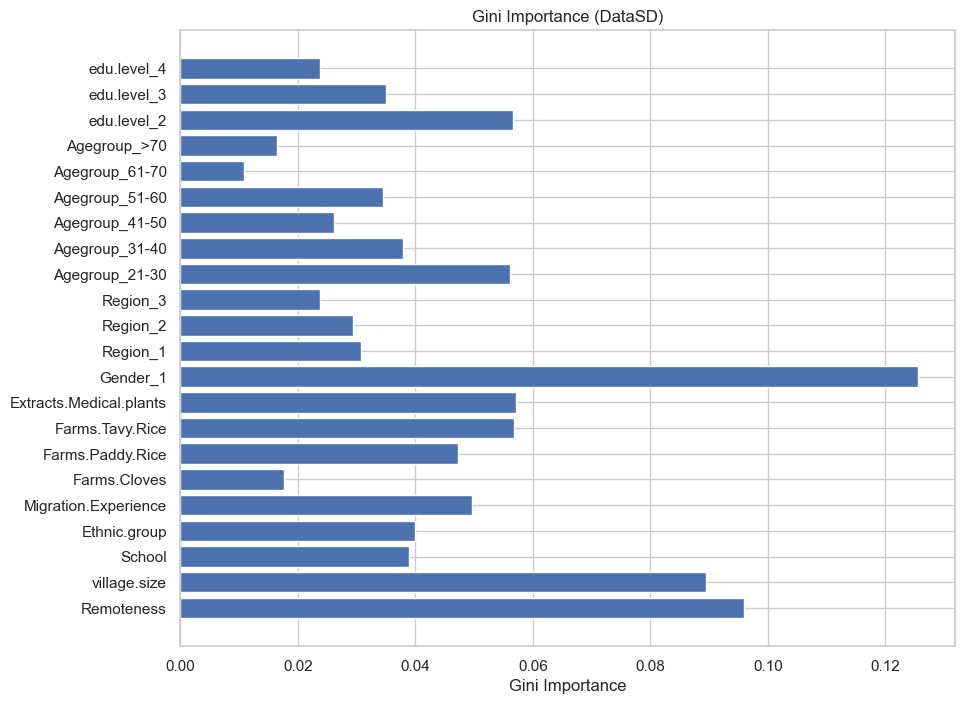

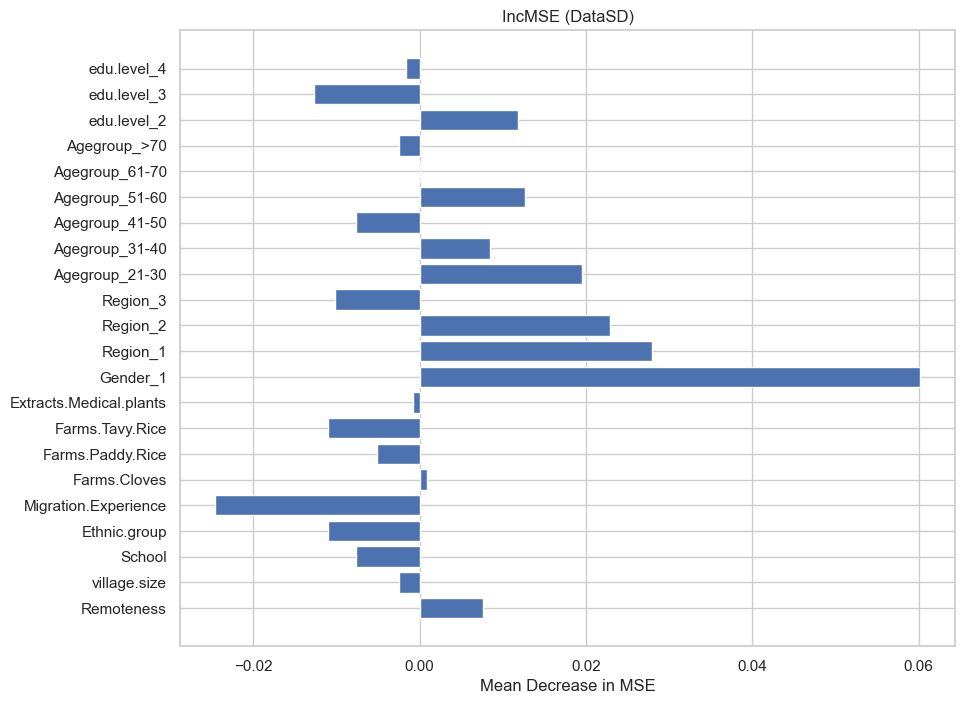

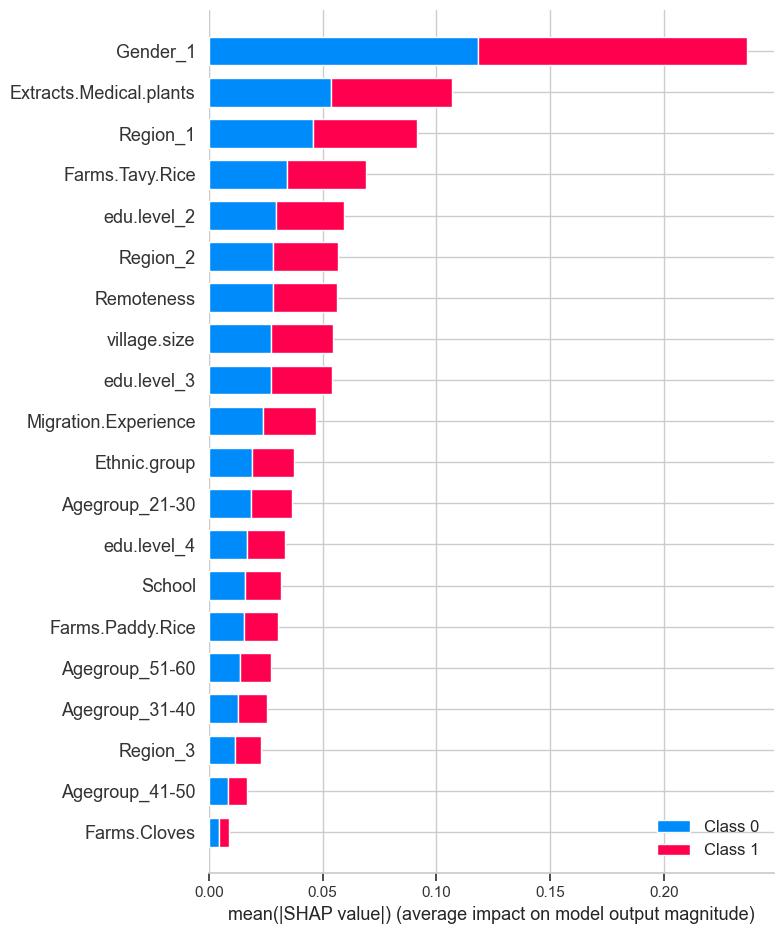

Original R-squared: -0.49195402298850577
Original MSE: 0.3728813559322034


In [21]:
X_sd, y_sd = preprocess_data_with_one_hot_encoding(df)
scaler = StandardScaler()
X_sd_scaled = pd.DataFrame(scaler.fit_transform(X_sd), columns=X_sd.columns, index=X_sd.index)
X_train_sd, X_test_sd, y_train_sd, y_test_sd = train_test_split(X_sd_scaled, y_sd, test_size=0.3, random_state=42)

# Train a Random Forest classifier on the dataset
rf_sd = RandomForestClassifier(random_state=42)
rf_sd.fit(X_train_sd, y_train_sd)
y_pred_sd = rf_sd.predict(X_test_sd)

# Calculate feature importance (Gini Importance)
gini_importance_sd = rf_sd.feature_importances_
features_sd = X_sd.columns
plt.figure(figsize=(10, 8))
plt.barh(features_sd, gini_importance_sd)
plt.title("Gini Importance (DataSD)")
plt.xlabel("Gini Importance")
plt.show()

#IncMSE (using permutation importance)
result_sd = permutation_importance(rf_sd, X_test_sd, y_test_sd, n_repeats=10, random_state=42)
perm_importance_sd = result_sd.importances_mean

# Plot IncMSE
plt.figure(figsize=(10, 8))
plt.barh(features_sd, perm_importance_sd)
plt.title("IncMSE (DataSD)")
plt.xlabel("Mean Decrease in MSE")
plt.show()

# SHAP values with feature names
explainer_sd = shap.TreeExplainer(rf_sd)
shap_values_sd = explainer_sd.shap_values(X_test_sd)
shap.summary_plot(shap_values_sd, X_test_sd, feature_names=features_sd)
r2_sd = r2_score(y_test_sd, y_pred_sd)
mse_sd = mean_squared_error(y_test_sd, y_pred_sd)

print(f"Original R-squared: {r2_sd}")
print(f"Original MSE: {mse_sd}")

## DATA SOCIOECO + BK

                    feature        VIF
0                    ID.nom   5.039805
1                ID.vis.Aye   1.769202
2              Other.lemurs   4.328562
3              Diet.Insects   2.427733
4           Knowledge.signs   1.566092
5       Knowledge.Abundance   2.518415
6        Activity.knowledge   3.434231
7          Weight.knowledge   1.648140
8       Lifestyle.knowledge   2.244863
9           Lemur.knowledge   2.865282
10        Aye.aye.protected   4.479386
11       encountered.binary   1.904344
12               Remoteness   2.214621
13             village.size   2.595311
14                   School   2.032460
15             Ethnic.group   1.132185
16     Migration.Experience   1.225041
17             Farms.Cloves   1.204751
18         Farms.Paddy.Rice   1.728949
19          Farms.Tavy.Rice   1.471578
20  Extracts.Medical.plants   1.527611
21                 Gender_1   1.237892
22                 Region_1  13.043161
23                 Region_2  13.595936
24                 Region

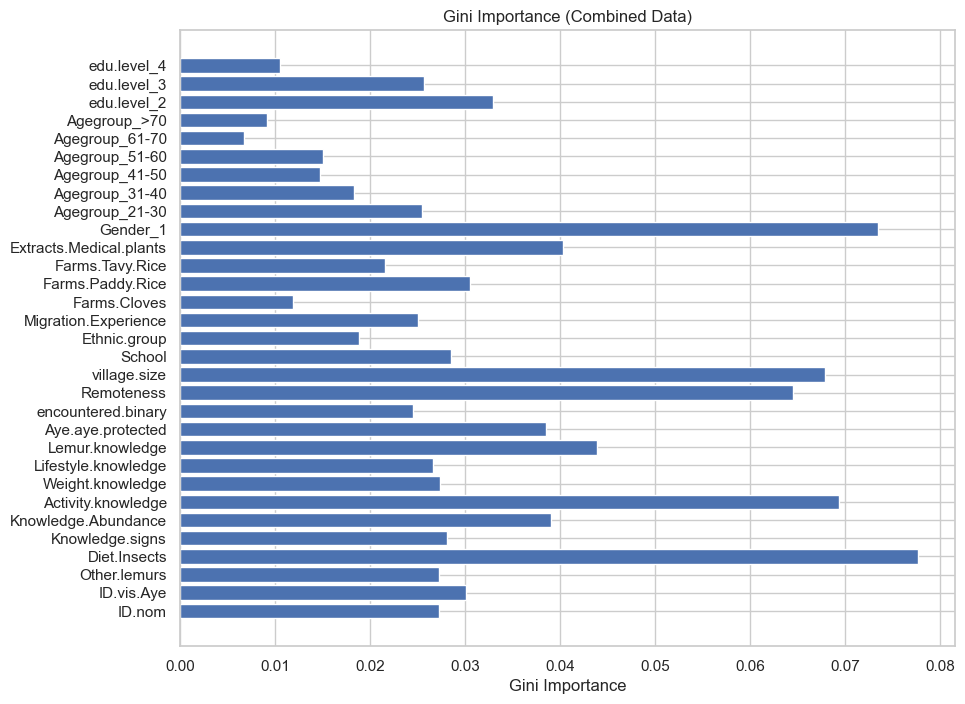

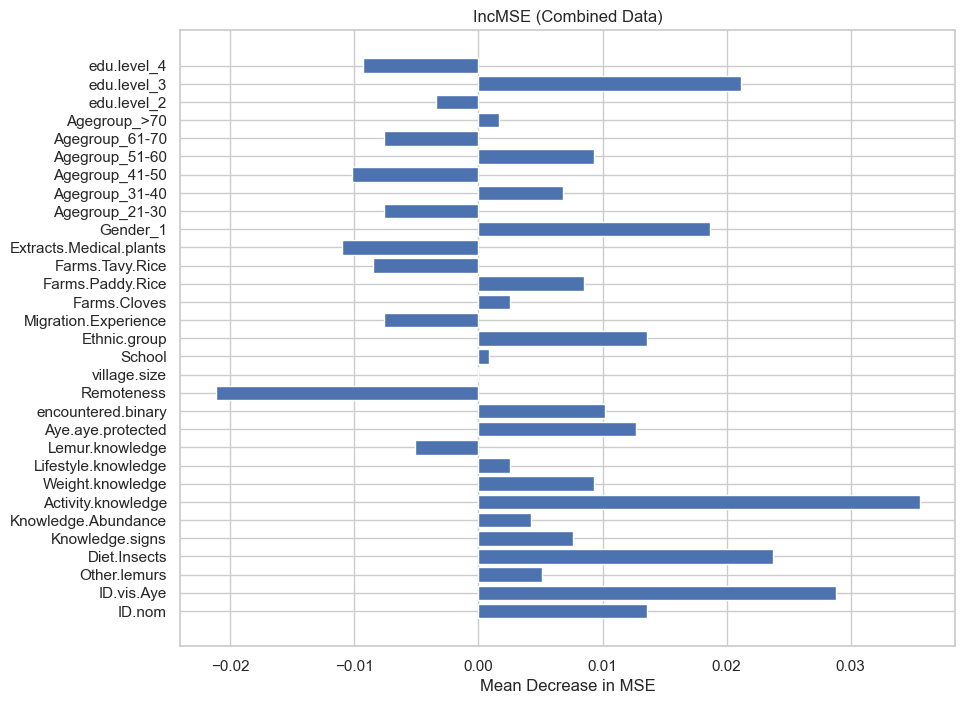

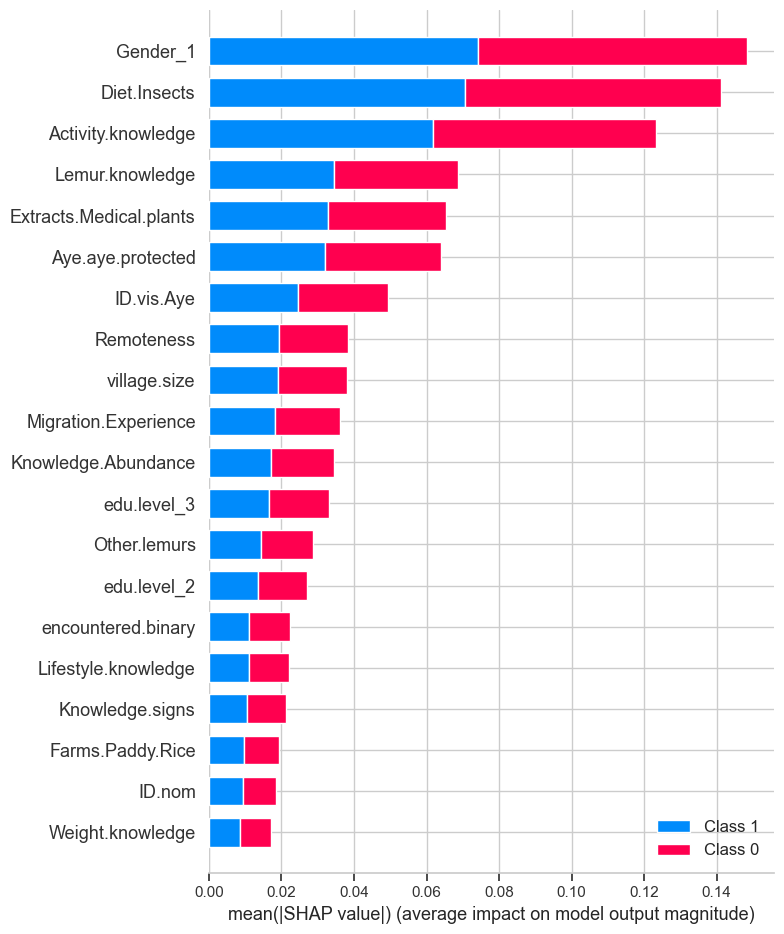

R-squared: -0.25459770114942537
MSE: 0.3135593220338983


In [22]:
y_combined = y_bk  # assuming both are same
X_combined = pd.concat([X_bk, X_sd_scaled], axis=1)
X_combined.fillna(X_combined.mean(), inplace=True)

# VIF- detect multicollinearity
def calculate_vif(df):
    vif_data = pd.DataFrame()
    vif_data["feature"] = df.columns
    vif_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return vif_data

vif_before = calculate_vif(X_combined)
print(vif_before)

# Remove high VIF features
high_vif_features = vif_before[vif_before['VIF'] > 10]['feature']
X_combined_reduced = X_combined.drop(columns=high_vif_features)

# Standardize the features (Random Forest doesn't require it, but it helps with model interpretability)
scaler = StandardScaler()
X_combined_scaled = pd.DataFrame(scaler.fit_transform(X_combined_reduced), columns=X_combined_reduced.columns)
X_train_combined, X_test_combined, y_train_combined, y_test_combined = train_test_split(X_combined_scaled, y_combined, test_size=0.3, random_state=42)
rf_combined = RandomForestClassifier(random_state=42)
rf_combined.fit(X_train_combined, y_train_combined)
y_pred_combined = rf_combined.predict(X_test_combined)

# Calculate feature importance (Gini Importance)
gini_importance_combined = rf_combined.feature_importances_
features_combined = X_combined_reduced.columns
plt.figure(figsize=(10, 8))
plt.barh(features_combined, gini_importance_combined)
plt.title("Gini Importance (Combined Data)")
plt.xlabel("Gini Importance")
plt.show()

# IncMSE (using permutation importance)
result_combined = permutation_importance(rf_combined, X_test_combined, y_test_combined, n_repeats=10, random_state=42)
perm_importance_combined = result_combined.importances_mean
plt.figure(figsize=(10, 8))
plt.barh(features_combined, perm_importance_combined)
plt.title("IncMSE (Combined Data)")
plt.xlabel("Mean Decrease in MSE")
plt.show()

# SHAP values
explainer_combined = shap.TreeExplainer(rf_combined)
shap_values_combined = explainer_combined.shap_values(X_test_combined)
shap.summary_plot(shap_values_combined, X_test_combined, feature_names=features_combined)
r2_combined = r2_score(y_test_combined, y_pred_combined)
mse_combined = mean_squared_error(y_test_combined, y_pred_combined)

print(f"R-squared: {r2_combined}")
print(f"MSE: {mse_combined}")

In [23]:
X_combined.columns

Index(['ID.nom', 'ID.vis.Aye', 'Other.lemurs', 'Diet.Insects',
       'Knowledge.signs', 'Knowledge.Abundance', 'Activity.knowledge',
       'Weight.knowledge', 'Lifestyle.knowledge', 'Lemur.knowledge',
       'Aye.aye.protected', 'encountered.binary', 'Remoteness', 'village.size',
       'School', 'Ethnic.group', 'Migration.Experience', 'Farms.Cloves',
       'Farms.Paddy.Rice', 'Farms.Tavy.Rice', 'Extracts.Medical.plants',
       'Gender_1', 'Region_1', 'Region_2', 'Region_3', 'Agegroup_21-30',
       'Agegroup_31-40', 'Agegroup_41-50', 'Agegroup_51-60', 'Agegroup_61-70',
       'Agegroup_>70', 'edu.level_2', 'edu.level_3', 'edu.level_4'],
      dtype='object')

In [24]:
X_redefined = X_combined[['ID.nom', 'ID.vis.Aye', 'Other.lemurs', 'Diet.Insects',
       'Knowledge.signs', 'Knowledge.Abundance', 'Activity.knowledge',
       'Weight.knowledge', 'Lifestyle.knowledge', 'Lemur.knowledge',
       'Aye.aye.protected', 'encountered.binary', 'Remoteness', 'village.size',
       'School', 'Ethnic.group', 'Migration.Experience', 'Farms.Cloves',
       'Farms.Paddy.Rice', 'Farms.Tavy.Rice', 'Extracts.Medical.plants',
       'Gender_1', 'Region_1', 'Region_2', 'Region_3', 'Agegroup_21-30',
       'Agegroup_31-40', 'Agegroup_41-50', 'Agegroup_51-60', 'Agegroup_61-70',
       'Agegroup_>70', 'edu.level_2', 'edu.level_3', 'edu.level_4']]

In [52]:
chi2_scores, p_values = chi2(abs(X_combined_reduced), y_combined)
chi2_results = pd.DataFrame({
    'Feature': X_combined_scaled.columns,
    'Chi2 Score': chi2_scores,
    'p-value': p_values
})
chi2_results_sorted = chi2_results.sort_values(by='p-value', ascending=True)
print(chi2_results_sorted)

                    Feature  Chi2 Score       p-value
3              Diet.Insects   36.877871  1.257653e-09
1                ID.vis.Aye   24.963978  5.841152e-07
6        Activity.knowledge   14.311917  1.548813e-04
11       encountered.binary   12.006680  5.301021e-04
17             Farms.Cloves   11.326280  7.641785e-04
7          Weight.knowledge    9.473615  2.084482e-03
2              Other.lemurs    9.053031  2.622597e-03
25           Agegroup_51-60    7.474994  6.256179e-03
9           Lemur.knowledge    7.229094  7.173140e-03
10        Aye.aye.protected    7.077394  7.806248e-03
5       Knowledge.Abundance    5.905756  1.509149e-02
4           Knowledge.signs    5.766727  1.633242e-02
8       Lifestyle.knowledge    4.659131  3.088882e-02
21                 Gender_1    4.657686  3.091482e-02
15             Ethnic.group    4.539546  3.312038e-02
13             village.size    2.604237  1.065784e-01
30              edu.level_4    2.521198  1.123252e-01
0                    ID.nom 

In [54]:
X_combined_reduced.columns

Index(['ID.nom', 'ID.vis.Aye', 'Other.lemurs', 'Diet.Insects',
       'Knowledge.signs', 'Knowledge.Abundance', 'Activity.knowledge',
       'Weight.knowledge', 'Lifestyle.knowledge', 'Lemur.knowledge',
       'Aye.aye.protected', 'encountered.binary', 'Remoteness', 'village.size',
       'School', 'Ethnic.group', 'Migration.Experience', 'Farms.Cloves',
       'Farms.Paddy.Rice', 'Farms.Tavy.Rice', 'Extracts.Medical.plants',
       'Gender_1', 'Agegroup_21-30', 'Agegroup_31-40', 'Agegroup_41-50',
       'Agegroup_51-60', 'Agegroup_61-70', 'Agegroup_>70', 'edu.level_2',
       'edu.level_3', 'edu.level_4'],
      dtype='object')

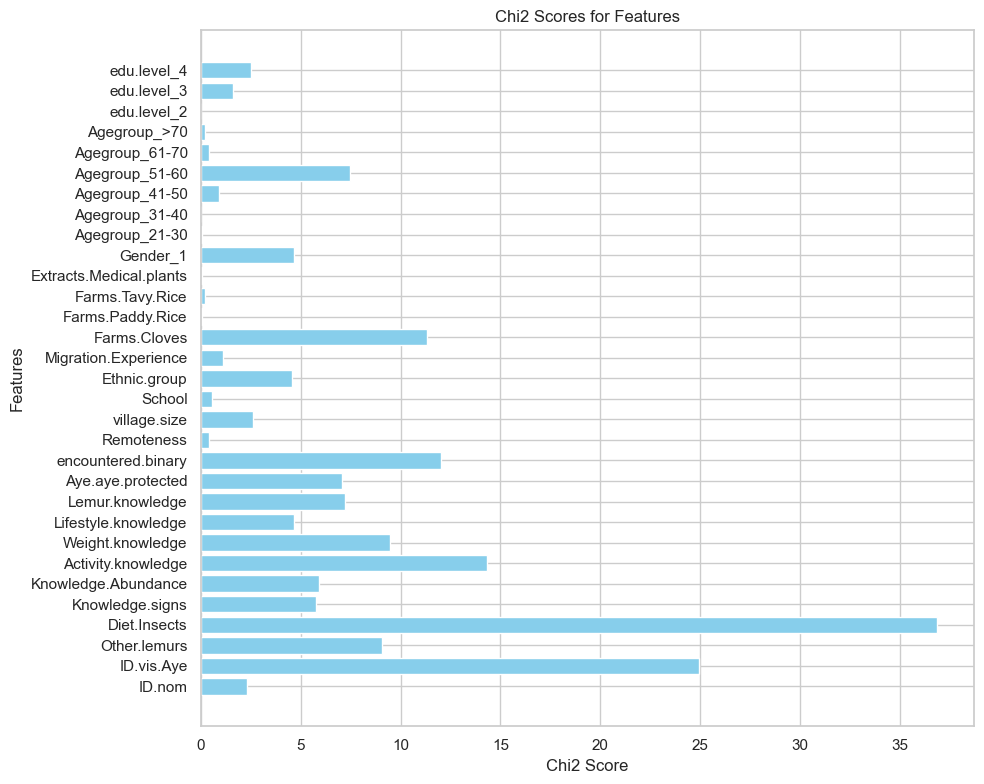

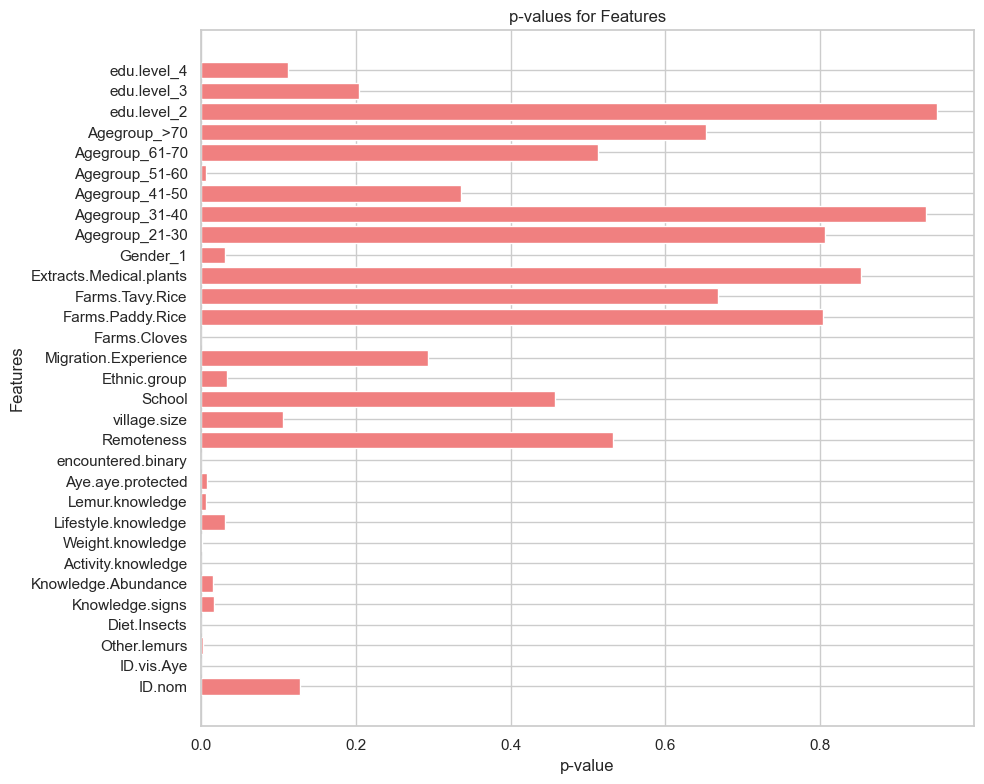

In [51]:
chi2_scores, p_values = chi2(abs(X_combined_reduced), y_combined)

chi2_results_hashmap = {
    feature: {"Chi2 Score": chi2_score, "p-value": p_value}
    for feature, chi2_score, p_value in zip(X_combined_reduced.columns, chi2_scores, p_values)
}

features = list(chi2_results_hashmap.keys())
chi2_scores = [stats["Chi2 Score"] for stats in chi2_results_hashmap.values()]
p_values = [stats["p-value"] for stats in chi2_results_hashmap.values()]

plt.figure(figsize=(10, 8))
plt.barh(features, chi2_scores, color='skyblue')
plt.xlabel('Chi2 Score')
plt.ylabel('Features')
plt.title('Chi2 Scores for Features')
plt.tight_layout()
plt.show()
plt.figure(figsize=(10, 8))
plt.barh(features, p_values, color='lightcoral')
plt.xlabel('p-value')
plt.ylabel('Features')
plt.title('p-values for Features')
plt.tight_layout()
plt.show()

### Selecting top 15 features from the Chi Square test and re-training the Random Forest model

Hence Classification is About Correctly Predicting Classes, R-Squared metric is not a suitable metric for evaluating our model, instead we use Accuracy, Precision, Recall and F1 Score. 

In [68]:
def train_and_evaluate_model(X, y, dataset_name):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    rf_model = RandomForestClassifier(random_state=42)
    rf_model.fit(X_train, y_train)
    y_pred = rf_model.predict(X_test)
    
    # Metrics
    accuracy = accuracy_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    # print(f"Dataset: {dataset_name}")
    # print(f"Accuracy: {accuracy}")
    # print(f"MSE: {mse}")
    
    return {
        'Dataset': dataset_name,
        'Accuracy': accuracy,
        'MSE': mse
    }


In [69]:
print(X_combined_reduced.columns)

Index(['ID.nom', 'ID.vis.Aye', 'Other.lemurs', 'Diet.Insects',
       'Knowledge.signs', 'Knowledge.Abundance', 'Activity.knowledge',
       'Weight.knowledge', 'Lifestyle.knowledge', 'Lemur.knowledge',
       'Aye.aye.protected', 'encountered.binary', 'Remoteness', 'village.size',
       'School', 'Ethnic.group', 'Migration.Experience', 'Farms.Cloves',
       'Farms.Paddy.Rice', 'Farms.Tavy.Rice', 'Extracts.Medical.plants',
       'Gender_1', 'Agegroup_21-30', 'Agegroup_31-40', 'Agegroup_41-50',
       'Agegroup_51-60', 'Agegroup_61-70', 'Agegroup_>70', 'edu.level_2',
       'edu.level_3', 'edu.level_4'],
      dtype='object')


In [85]:
def automated_feature_evaluation(chi2_results_sorted, X_combined_reduced, y_combined, start=3, end=32):
    results = []

    # Loop through feature counts from 'start' to 'end'
    for n in range(start, end + 1):
        # Select the top 'n' features based on Chi2 Score
        top_n_features = chi2_results_sorted['Feature'].head(n)
        X_top_n_features = X_combined_reduced[top_n_features]
        result = train_and_evaluate_model(X_top_n_features, y_combined, f'Top {n} Features')
        results.append(result)
    
    return results
results_from_top_3_to_32 = automated_feature_evaluation(chi2_results_sorted, X_combined_reduced, y_combined, start=3, end=32)

# Print the results for each feature subset
for res in results_from_top_3_to_32:
    print(res)


{'Dataset': 'Top 3 Features', 'Accuracy': 0.6694915254237288, 'MSE': 0.3305084745762712}
{'Dataset': 'Top 4 Features', 'Accuracy': 0.6779661016949152, 'MSE': 0.3220338983050847}
{'Dataset': 'Top 5 Features', 'Accuracy': 0.6694915254237288, 'MSE': 0.3305084745762712}
{'Dataset': 'Top 6 Features', 'Accuracy': 0.6610169491525424, 'MSE': 0.3389830508474576}
{'Dataset': 'Top 7 Features', 'Accuracy': 0.6694915254237288, 'MSE': 0.3305084745762712}
{'Dataset': 'Top 8 Features', 'Accuracy': 0.652542372881356, 'MSE': 0.3474576271186441}
{'Dataset': 'Top 9 Features', 'Accuracy': 0.6779661016949152, 'MSE': 0.3220338983050847}
{'Dataset': 'Top 10 Features', 'Accuracy': 0.711864406779661, 'MSE': 0.288135593220339}
{'Dataset': 'Top 11 Features', 'Accuracy': 0.7203389830508474, 'MSE': 0.2796610169491525}
{'Dataset': 'Top 12 Features', 'Accuracy': 0.6949152542372882, 'MSE': 0.3050847457627119}
{'Dataset': 'Top 13 Features', 'Accuracy': 0.6694915254237288, 'MSE': 0.3305084745762712}
{'Dataset': 'Top 14 

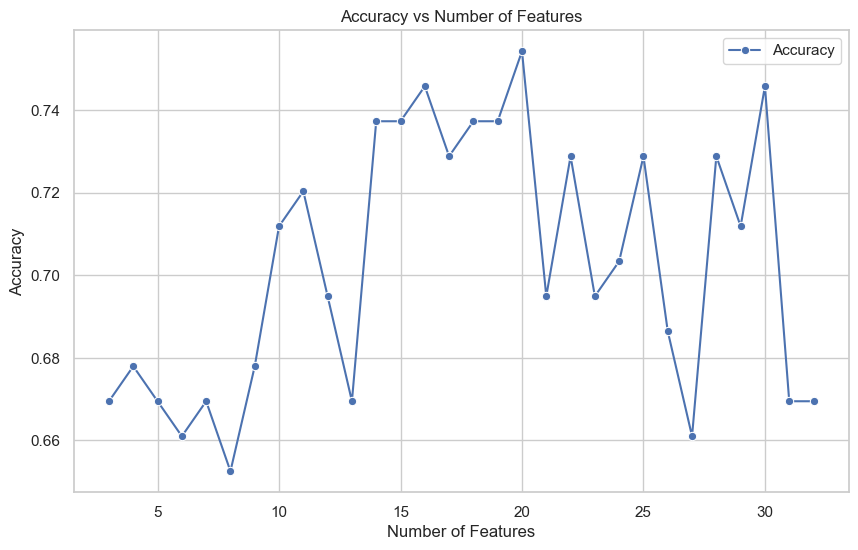

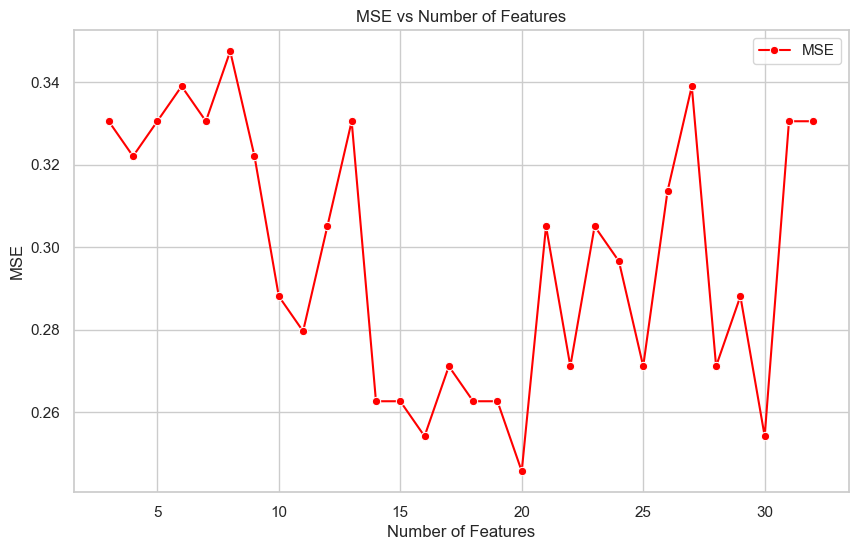

In [86]:
# import seaborn as sns
# import matplotlib.pyplot as plt
# import pandas as pd

n_features = list(range(3, 33)) 
accuracies = [res['Accuracy'] for res in results_from_top_3_to_32]
mses = [res['MSE'] for res in results_from_top_3_to_32]
plot_data = pd.DataFrame({
    'Number of Features': n_features,
    'Accuracy': accuracies,
    'MSE': mses
})
# ACC
plt.figure(figsize=(10, 6))
sns.lineplot(x='Number of Features', y='Accuracy', data=plot_data, marker="o", label="Accuracy")
plt.title('Accuracy vs Number of Features')
plt.xlabel('Number of Features')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# MSE
plt.figure(figsize=(10, 6))
sns.lineplot(x='Number of Features', y='MSE', data=plot_data, marker="o", label="MSE", color="red")
plt.title('MSE vs Number of Features')
plt.xlabel('Number of Features')
plt.ylabel('MSE')
plt.legend()
plt.grid(True)
plt.show()


In [87]:
top_20_features = chi2_results_sorted['Feature'].head(20)
X_top_20_features = X_combined_reduced[top_20_features]
X_top_20_features.columns

Index(['Diet.Insects', 'ID.vis.Aye', 'Activity.knowledge',
       'encountered.binary', 'Farms.Cloves', 'Weight.knowledge',
       'Other.lemurs', 'Agegroup_51-60', 'Lemur.knowledge',
       'Aye.aye.protected', 'Knowledge.Abundance', 'Knowledge.signs',
       'Lifestyle.knowledge', 'Gender_1', 'Ethnic.group', 'village.size',
       'edu.level_4', 'ID.nom', 'edu.level_3', 'Migration.Experience'],
      dtype='object')

{'Dataset': 'Top 20 Features', 'Accuracy': 0.7542372881355932, 'MSE': 0.2457627118644068}


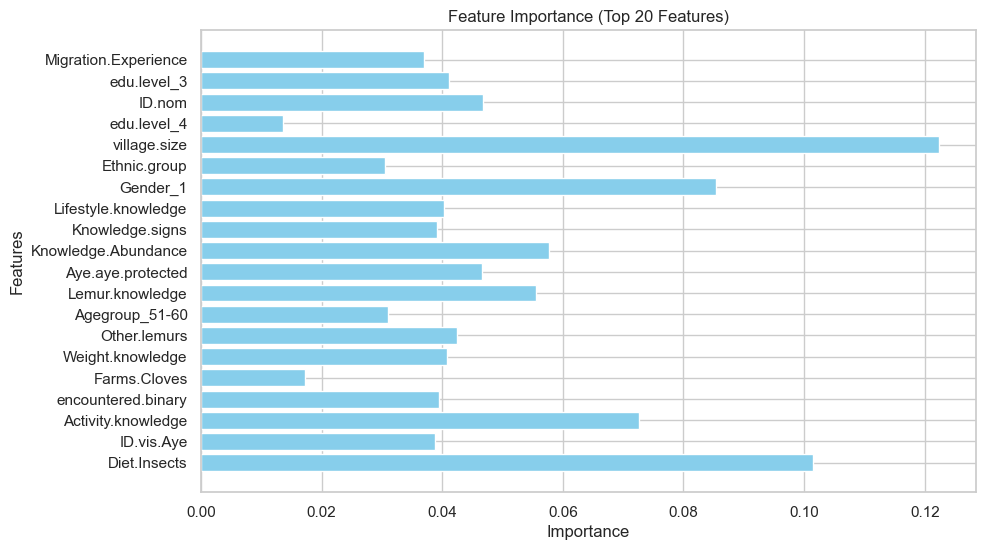

Shape of X_test_df: (118, 20)
Shape of SHAP values: (118, 20)


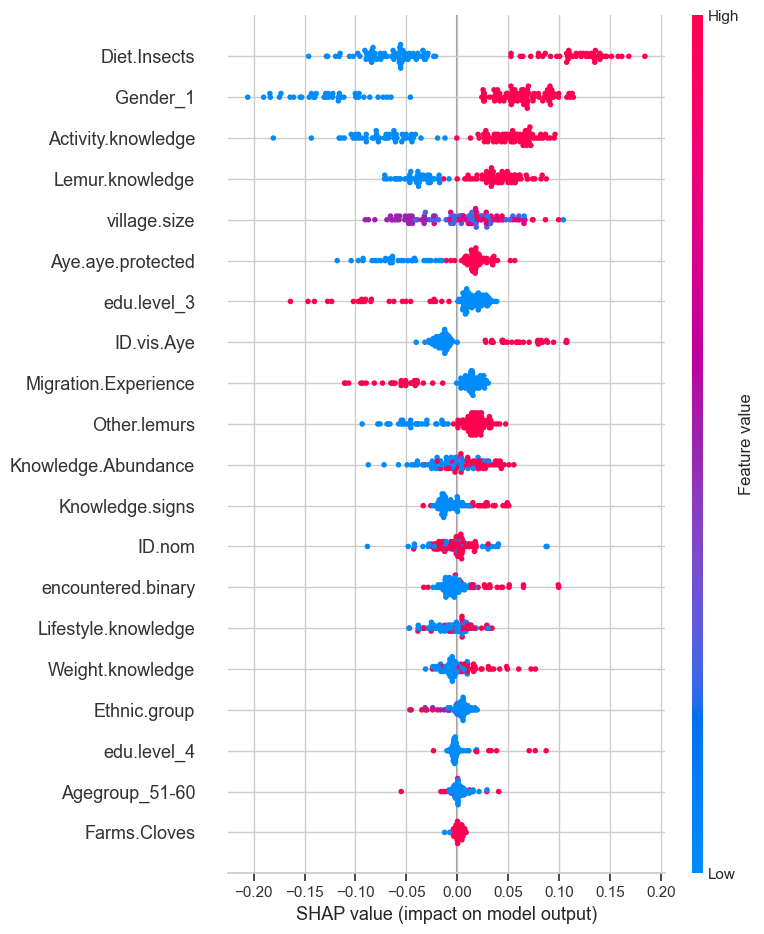

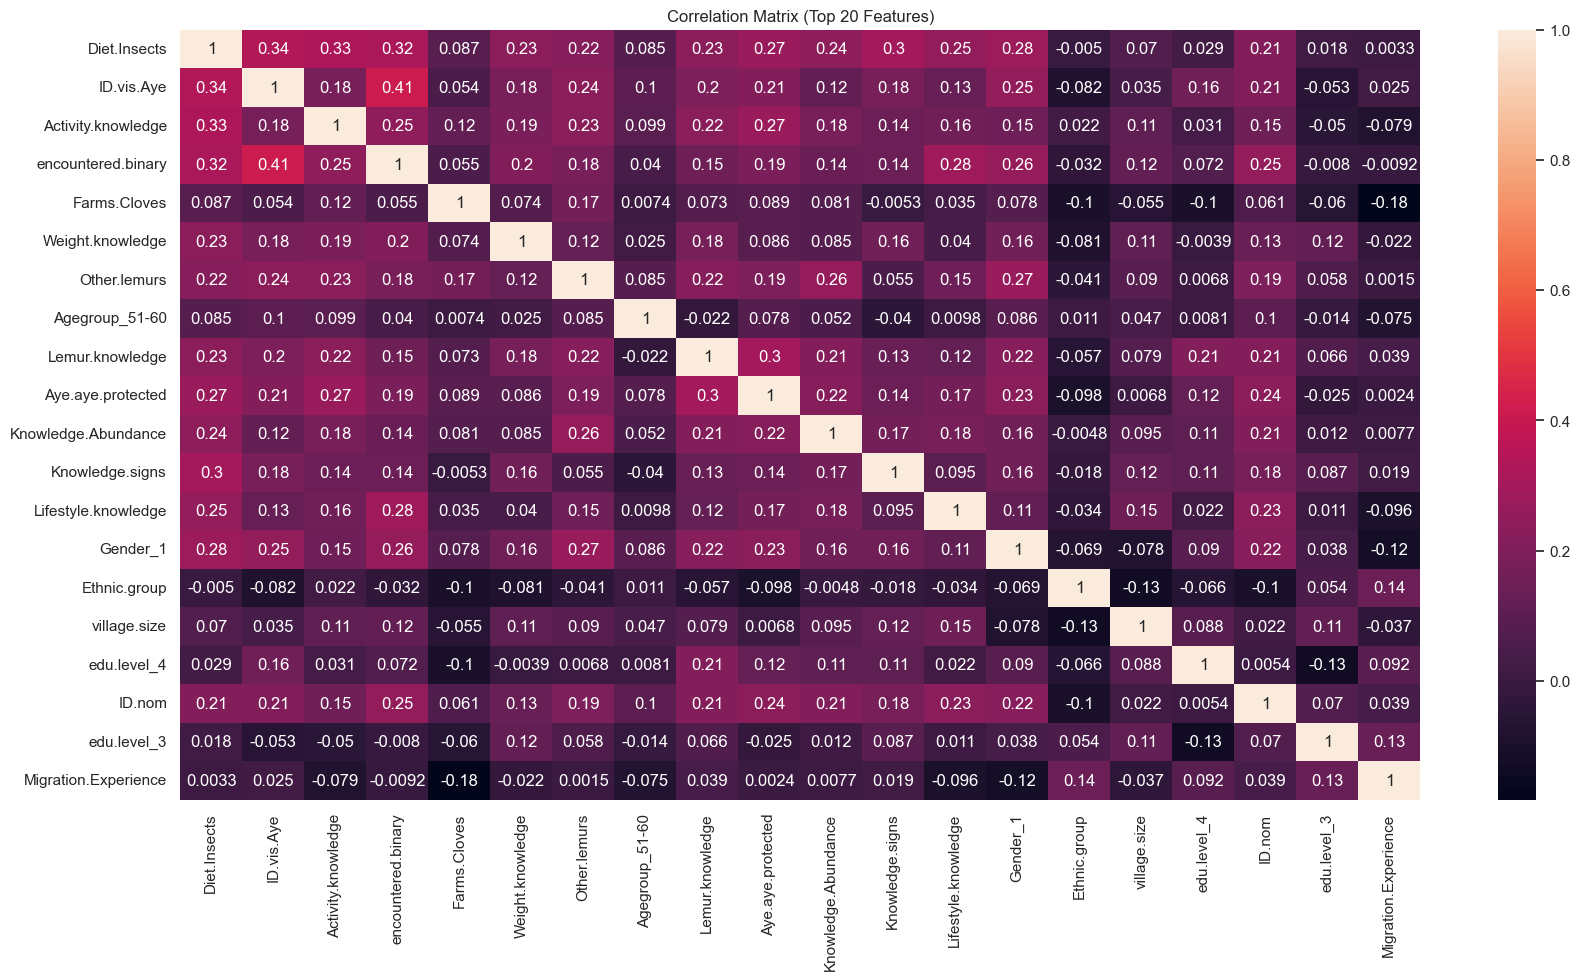

In [105]:
top_20_features = chi2_results_sorted['Feature'].head(20)
X_top_20_features = X_combined_reduced[top_20_features]
rf_model_top_20 = RandomForestClassifier(random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_top_20_features, y_combined, test_size=0.3, random_state=42)
rf_model_top_20.fit(X_train, y_train)
results_top_20_features = train_and_evaluate_model(X_top_20_features, y_combined, 'Top 20 Features')
print(results_top_20_features)

# Step 4: Feature Importance Analysis
# Get feature importances from the model trained on the top 20 features
importances_top_20 = rf_model_top_20.feature_importances_

# Plot the feature importances for the top 20 features
plt.figure(figsize=(10, 6))
plt.barh(top_20_features, importances_top_20, color='skyblue')
plt.title("Feature Importance (Top 20 Features)")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

X_test_df = pd.DataFrame(X_test, columns=top_20_features)
# Step 2: Create a SHAP explainer for the RandomForest model
explainer_top_20 = shap.TreeExplainer(rf_model_top_20)
# Step 3: Calculate SHAP values for the test set and de-bugging
shap_values_top_20 = explainer_top_20.shap_values(X_test_df)
print("Shape of X_test_df:", X_test_df.shape)
print("Shape of SHAP values:", shap_values_top_20[1].shape)  # For binary classification
shap.summary_plot(shap_values_top_20[1], X_test_df)

# Step 7: Correlation Matrix for the Top 20 Features
plt.figure(figsize=(20, 10))
sns.heatmap(X_top_20_features.corr(), annot=True)
plt.title("Correlation Matrix (Top 20 Features)")
plt.show()